# 02 - Baseline Model
Bu notebook, veri seti üzerinde ilk çalışan makine öğrenimi modelini (baseline) oluşturacak ve
Feature engineering yapmadan önce modelin temel performansını görmek amacı ile tahminlenecektir.

Baseline Model for Cancer Patient Risk Level Prediction
========================================================
Baseline Stratejisi:
- Minimal preprocessing
- Tek bir simple model (Logistic Regression)
- Temel evaluation metrics

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv('../data/raw/cancer-patient-data-sets.csv')

df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [87]:
print(df.shape)
df.head()

(1000, 26)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [80]:
# PREPROCESSING (MINIMAL)
# Feature matrixini oluşturalım.


X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
    'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
    'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
    'Chest Pain', 'Coughing of Blood', 'Fatigue',
    'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
    'Dry Cough', 'Snoring',]].values

X[:5]

array([[33,  1,  2,  4,  5,  4,  3,  2,  2,  4,  3,  2,  4,  3,  4,  2,
         2,  3,  1,  2,  3,  4],
       [17,  1,  3,  1,  5,  3,  4,  2,  2,  2,  2,  2,  3,  1,  3,  7,
         8,  6,  2,  1,  7,  2],
       [35,  1,  4,  5,  6,  5,  5,  4,  6,  7,  2,  4,  8,  8,  7,  9,
         2,  1,  4,  6,  7,  2],
       [37,  1,  7,  7,  7,  7,  6,  7,  7,  7,  7,  7,  8,  4,  2,  3,
         1,  4,  5,  6,  7,  5],
       [46,  1,  6,  8,  7,  7,  7,  6,  7,  7,  8,  7,  9,  3,  2,  4,
         1,  4,  2,  4,  2,  3]])

In [88]:
# Kullanmayacağımız sütunları silelim.

df = df.drop(['index', 'Patient Id'], axis=1)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  test verisindeki numerik verileri Scaling (ölçekleme) ilebelli bir standarda dönüştürdük.

In [92]:
# Target değişkeni encode edelim.

le = LabelEncoder()
df['Level_encoded'] = le.fit_transform(df['Level'])



In [91]:
#  Target matrixini oluşturalım.

y=df['Level_encoded']

y[:5]

0    1
1    2
2    0
3    0
4    0
Name: Level_encoded, dtype: int64

In [93]:
X = df.drop(['Level','Level_encoded'], axis=1)
y = df['Level_encoded']

# Level değişkeni yerine level_encoded için level kolonunu kaldıralım.

In [94]:
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [95]:
y.head()

0    1
1    2
2    0
3    0
4    0
Name: Level_encoded, dtype: int64

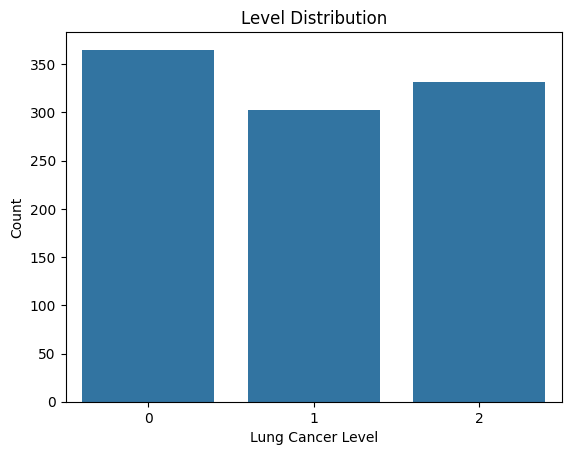

In [96]:
# Target değişkeni için seviyeleri gösteren bir grafik çıkardık.


sns.countplot(
    data=df,
    x='Level_encoded'
)

plt.title('Level Distribution')
plt.xlabel('Lung Cancer Level')
plt.ylabel('Count')
plt.show()

In [97]:
#  TRAIN-TEST SPLIT
#  Test ve train setleri oluşturuldu.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [105]:
#  BASELINE MODEL TRAINING

baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# baseline modeli olarak logisticRegression tercih ettim.
# modeli bu şekilde tahmin edelim.



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
# MODEL EVALUATION

y_pred = baseline_model.predict(X_test_scaled)

print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Model değerlendirme metriklerini kontrol edelim.



Baseline Accuracy: 0.2700

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.15      0.18        61
           1       0.23      0.18      0.20        66
           2       0.31      0.45      0.37        73

    accuracy                           0.27       200
   macro avg       0.25      0.26      0.25       200
weighted avg       0.26      0.27      0.25       200



In [ ]:
# Train predictions
#  Eğitim verisindeki tahminleri bulalım.

y_train_pred = baseline_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [ ]:
# Test predictions
#  Test verisindeki tahminleri bulalım.

y_test_pred = baseline_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [117]:
print(f"\nACCURACY SCORES:")
print(f"   Train Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Test Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print(f"\nClassification Report (Test Set):")
print("="*70)
print(classification_report(y_test, y_test_pred))





ACCURACY SCORES:
   Train Accuracy: 0.4338 (43.38%)
   Test Accuracy:  0.2700 (27.00%)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.23      0.15      0.18        61
           1       0.23      0.18      0.20        66
           2       0.31      0.45      0.37        73

    accuracy                           0.27       200
   macro avg       0.25      0.26      0.25       200
weighted avg       0.26      0.27      0.25       200



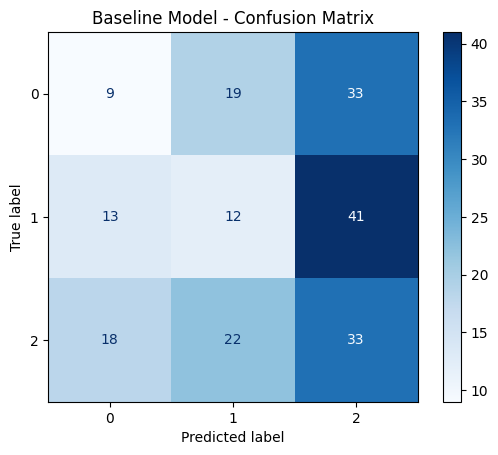

Confusion matrix saved as: docs/plots/baseline_confusion.png


In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = baseline_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=baseline_model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Baseline Model - Confusion Matrix")
plt.show()

plt.savefig("../docs/PNG/baseline_confusion.png", dpi=300, bbox_inches='tight')
plt.close()

print("Confusion matrix saved as: docs/plots/baseline_confusion.png")


# confusion matrix yapalım.